# Congnifyz Internship Program

# Restaurant Data Analysis

<b> Author - RENUKA PARAB <b>


# Level 1:
<b>Task 1: Data Exploration and Preprocessing <b>
<ul>
    <li>Explored the restaurant dataset, determining its dimensions.</li>
    <li>Managed missing values across columns, ensuring data integrity.</li>
    <li>Executed data type conversions as needed.</li>
    <li>Analyzed the distribution of the target variable, "Aggregate rating," and addressed class imbalances.</li>
</ul>
    
<b> Task 2: Descriptive Analysis <b>
<ul>
    <li>Calculated fundamental statistical measures (e.g., mean, median, standard deviation) for numerical columns.</li>
    <li>Investigated the distribution of categorical variables like "Country Code," "City," and "Cuisines."</li>
    <li>Identified the top cuisines and cities with the highest restaurant counts.</li>
</ul>
    
<b>Task 3: Geospatial Analysis <b>
<ul>
    <li>Visualized restaurant locations on maps using latitude and longitude data.</li>
    <li>Conducted an analysis of restaurant distribution across different cities and countries.</li>
    <li>Explored potential correlations between restaurant locations and ratings.</li>
</ul>

 # LEVEL 1 - Task 1

<b>Task - Data Exploration and Preprocessing <b>

In [1]:
# importing the warning
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#import the libraries which are useful for EDA

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns ;sns.set(color_codes = True)
%matplotlib inline

In [3]:
#Load the dataset 
df = pd.read_csv("Dataset .csv")


 <b>1. EXPLORE THE DATASET AND IDENTIFY THE NUMBER OF COLUMNS AND ROWS <b>

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.shape

(9551, 21)

<ul>
<li>THERE ARE 9551 ROWS AND 21 COLUMNS </li>
</ul>

 <b>2. Check for misssing values in each column and handle them accordingly.<b>

In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

<ul>
    <li> There are 9 missing values in "Cuisines" columns which is very less </li>
    <li> So, we can ignore or just replace theses with 'Not specified " </li>
</ul>

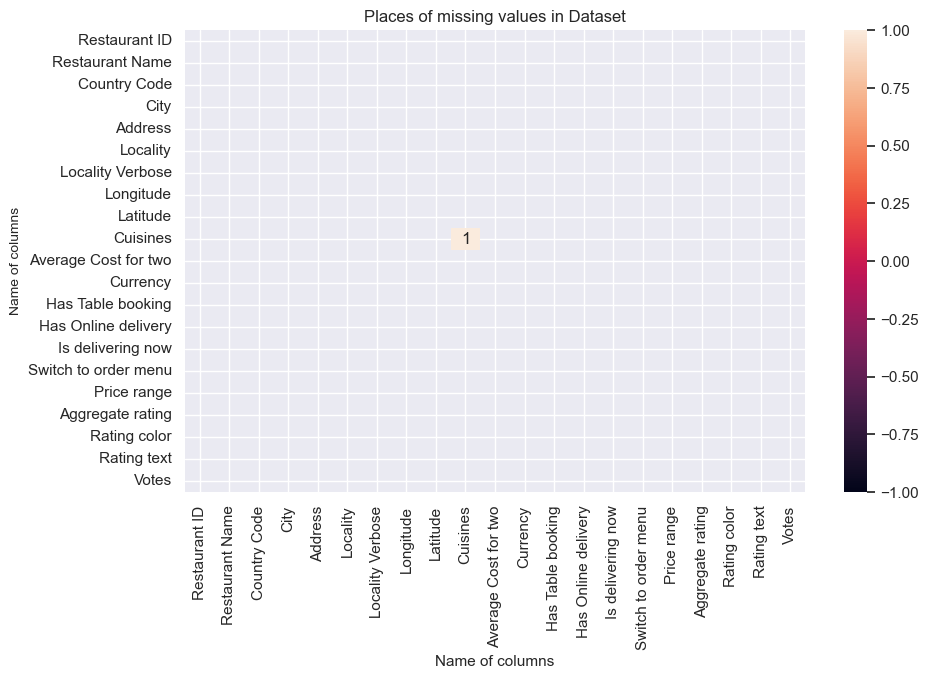

In [8]:
# Visualizing the missing values
# Checking Null Value by Plotting Heatmap

plt.figure(figsize = (10,6))
sns.heatmap(df.isnull().corr(), vmin=-1, annot= True)
plt.xlabel('Name of columns', fontsize=11)
plt.ylabel('Name of columns', fontsize=10)
plt.title('Places of missing values in Dataset', fontsize=12)
plt.show()

In [9]:
df['Cuisines'].fillna('Not Specified', inplace = True)

In [10]:
#verify 
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Now, There are No Missing values.

In [11]:
# check for duplicates 
dup = df.duplicated().sum()
print(' Number of Duplicated Rows are ', format(dup))

 Number of Duplicated Rows are  0


<b> 3. Perform data types conversion if necessary . Analyze the distribution of the target variable {'Aggregate Rating"} and identify any class imbalances .<b>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

<ul>
    <li> There is No need to do any conversion of data types </li>
</ul>

In [13]:
#Target variable "Aggregate rating "

target = "Aggregate rating"


#Descriptive statistics 
df[target].describe()

count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

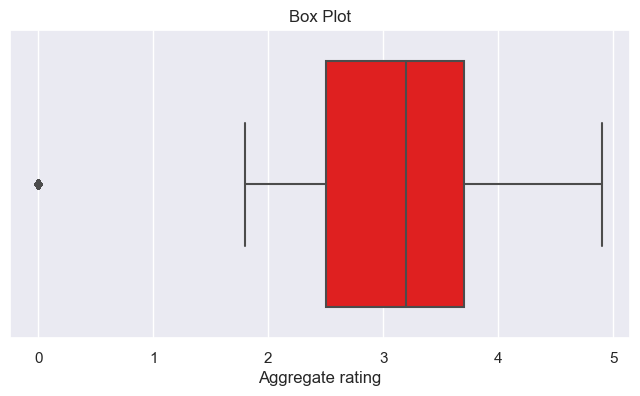

In [14]:
#Box plot 
plt.figure(figsize =(8,4))
sns.boxplot(x=df[target] , color= 'red')
plt.title('Box Plot')
plt.xlabel('Aggregate rating')
plt.show()

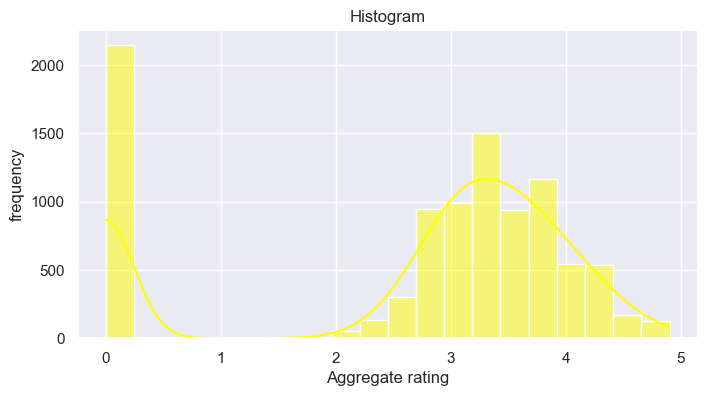

In [15]:
#Histogram 
plt.figure (figsize = (8,4))
sns.histplot(df[target], bins = 20 , kde = True , color = 'yellow')
plt.title('Histogram')
plt.xlabel('Aggregate rating')
plt.ylabel('frequency')
plt.show()

# Results from Level1- Task 1 

<ul>
    <li>The Restuarant dataset contains various restuarants information of different cities. Includes information such as restaurant name, city, address, locality, cuisines, rating and price range, among other things.</li>
    <li>There are 9551 rows and 21 columns provided in the data.</li>
    <li>Null values are only present in cuisines; Since there are only few null values present in cuisines (only 9) i will replace them as "Not Specified" in the data.</li>
    <li>No duplicate values exist.</li>
    <li>Data type conversion not required.</li>
    <li>Distribution of the target variable ("Aggregate rating") well balanced.</li>
</ul>
        

# Level 1 - Task 2

# Task :- Descriptive Analysis 

<b> 1. Calculate basic statistical measures (mean, median , standard deviation, etc. ) for numerical columns. <b>

In [16]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [17]:
df[["Average Cost for two","Price range","Aggregate rating","Votes"]].describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,1199.210763,1.804837,2.666370,156.909748
std,16121.183073,0.905609,1.516378,430.169145
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,131.000000
max,800000.000000,4.000000,4.900000,10934.000000


<b> 2. Explore the distribution of categorical variables like "Country Code","City", and "Cuisines". Identify the top cusines and cities with the highest number of restaurants.<b>

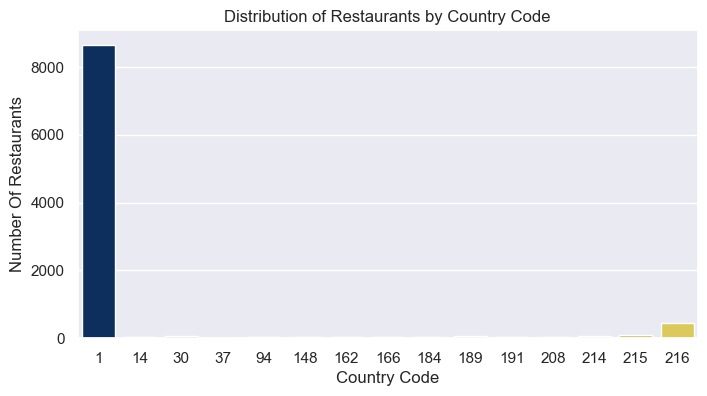

In [18]:
# Explore the distributions of "Country Code"
plt.figure (figsize = (8,4))
sns.countplot(x = 'Country Code', data = df, palette= 'cividis')
plt.title('Distribution of Restaurants by Country Code')
plt.xlabel('Country Code')
plt.ylabel('Number Of Restaurants')
plt.show()

<ul> 
 <li> Majority of Restaurants are loacated  in Country Code 1 . followed by i.e, second highest in Country Code 216. </li>
    </ul>

In [19]:
# Top countries  with thw highest number of restaurants 

top_countries = df["Country Code"].value_counts().head()

print('Top 5 Countries with the Highest Number of restaurants :')
print(top_countries)

Top 5 Countries with the Highest Number of restaurants :
Country Code
1      8652
216     434
215      80
30       60
214      60
Name: count, dtype: int64


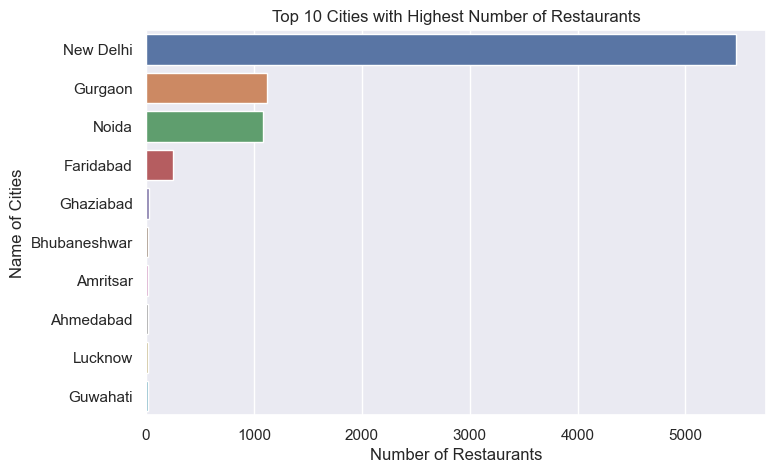

In [20]:
#Explore the distributions of  top 10 'Cities with highest number of restaurants . 
plt.figure(figsize=(8, 5))
sns.countplot(y = df['City'], order=df.City.value_counts().iloc[:10].index)
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cities')
plt.title('Top 10 Cities with Highest Number of Restaurants')
plt.show()

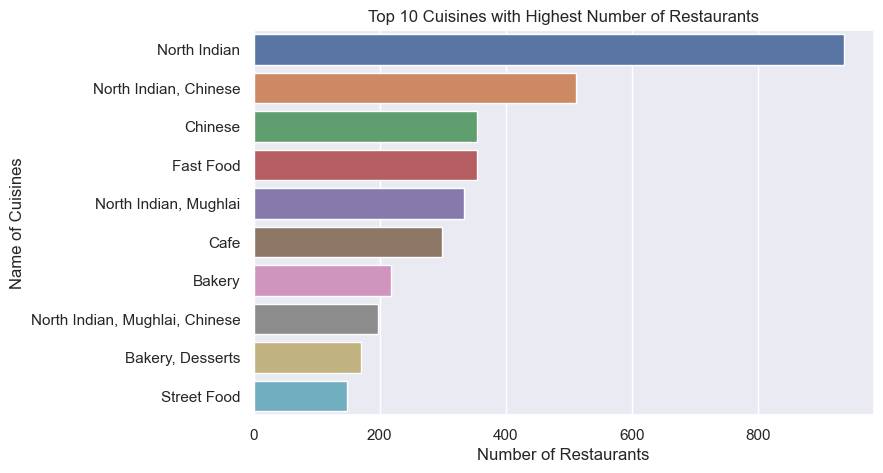

In [21]:
#explore the distributions of "Cuisines"
plt.figure(figsize=(8, 5))
sns.countplot(y = df['Cuisines'], order=df.Cuisines.value_counts().iloc[:10].index)
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cuisines')
plt.title('Top 10 Cuisines with Highest Number of Restaurants')
plt.show()

<b> Top Cuisines and Cities<b>

In [22]:
# Top cuisines and cities with the highest number of restaurants

# Identify the top 10 cuisines
top_cuisines = df['Cuisines'].value_counts().head(10)

# Display the results
print("Top 10 Cuisines with Highest Number of Restaurants:")
print(top_cuisines)
     

Top 10 Cuisines with Highest Number of Restaurants:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


In [23]:
# Identify the top 10 cities
top_cities = df['City'].value_counts().head(10)

# Display the results
print("Top 10 Cities with Highest Number of Restaurants:")
print(top_cities)

Top 10 Cities with Highest Number of Restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


# Results from Level 1- Task 2 

<ul>
    <li>Found statistical measures for the numerical columns.</li>
    <li>Country code 1 and 216 are with highest number of restaurants.</li>
    <li>New Delhi, Gurgaon and Noida are  top cities with highest number of restaurants.</li>
    <li>North Indian and Chinese cuisine are in top with highest number of restaurants.</li>
</ul>

# Level1 - Task 3 

# Task - Geospatial Analysis

<b> 1. Visualise the locations of restaurants on a map using latitude and longitude information . <b>

In [25]:
# Locations of restaurants on a map using latitude and longitude information
# Import the necessary libraries

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

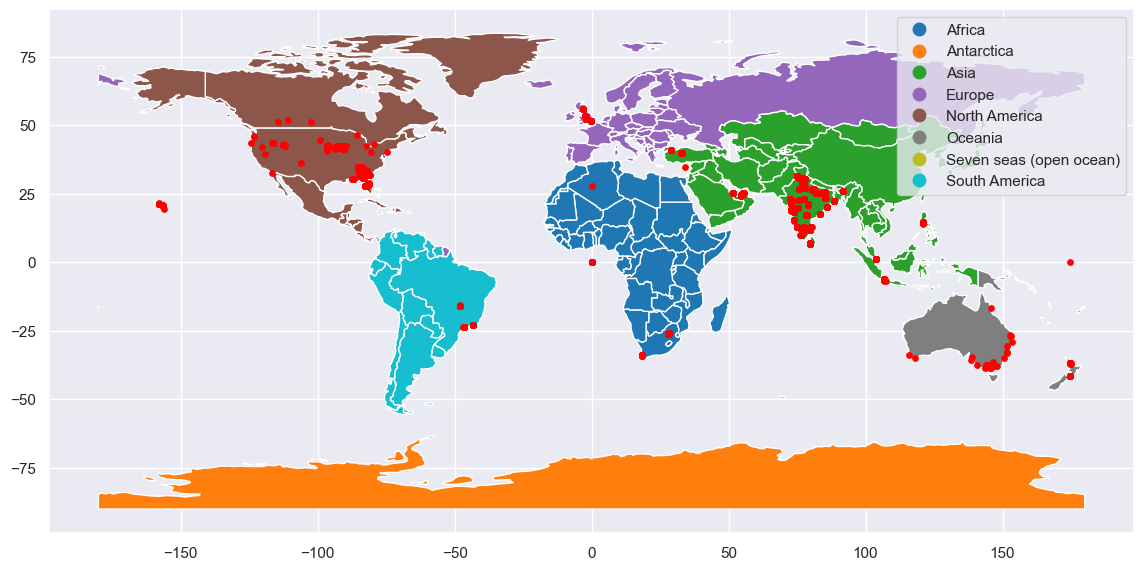

In [26]:
# Create Point geometry from latitude and longitude using Shapely
gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Create a base map of the world using Geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a map that fits the screen and plots the restaurant locations
# The "continent" column is used for coloring and a legend is displayed
gdf.plot(ax=world.plot("continent", legend = True, figsize=(14, 12)), marker='o', color='red', markersize=15)

# Show the map
plt.show()

<b> Distribution of Restaurants by City <b>

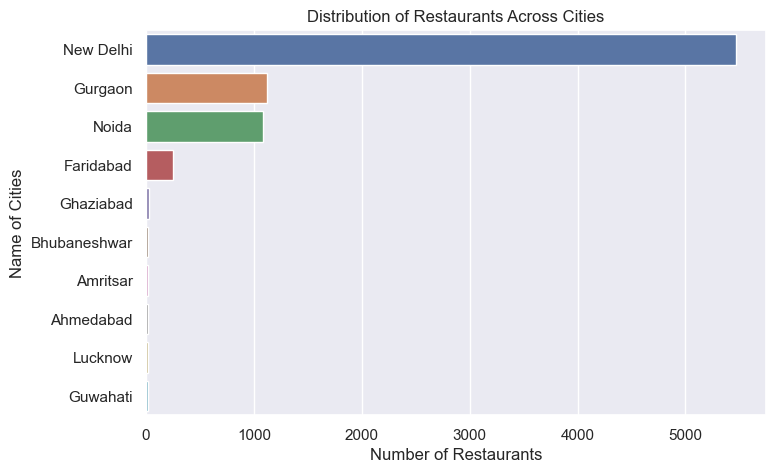

In [27]:
# Distribution of restaurants across different cities or countries
plt.figure(figsize=(8, 5))
sns.countplot(y = df['City'], order=df.City.value_counts().iloc[:10].index)
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cities')
plt.title('Distribution of Restaurants Across Cities')
plt.show()

<b> Correlation Between the Restaurant's Location and its Rating <b>

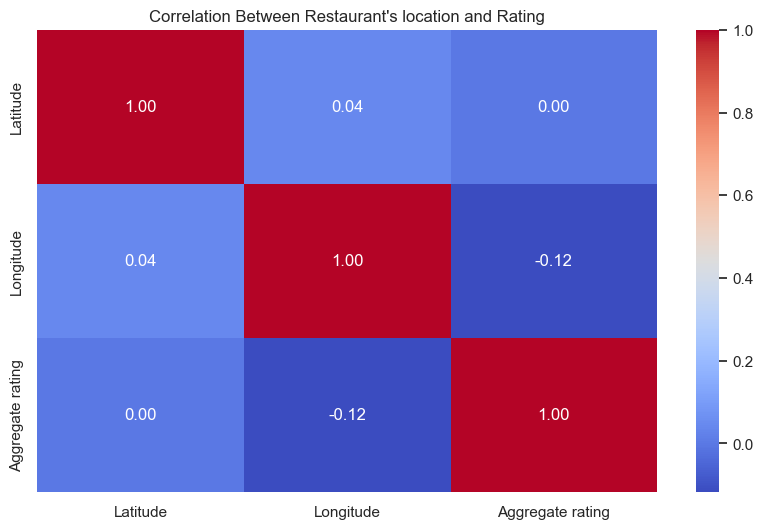

In [28]:
# Checking correlation between the restaurant's location and its rating
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Restaurant's location and Rating")
plt.show()

# Results From Task 3 


<ul>
    <li>North America and Asia(mainly India) have the most number of restaurants. Followed by Oceania and others.</li>
    <li>There is no correlation between Latitude and Rating. But, Longitude and Rating are negatively correlated.</li>
    <li>New Delhi have the most number of restaurants. Followed by Gurgaon, Noida and Faridabad.</li>
<ul>

# Conclusion
The insights which i found from the overall level 1 project:

## Data Overview:
<ul>
    <li>The dataset contains restaurant details across various cities with 9,551 rows and 21 columns.</li>
    <li> 9 missing values are found in the "Cuisines" column .</li>
    <li>No duplicates are present , and data type conversion wasn't needed.</li>
    <li>The 'Aggregate rating' distribution is well-balanced.</li>
</ul>

##  Descriptive Insights:
<ul>
    <li>Key statistical measures for numerical columns were identified.</li>
    <li> Majority of Restaurants are found in country code 1 and 216 .</li>
    <li>Top Cities with highest number of restaurants are New Delhi, Gurgaon, Noida.</li>
    <li> In cuisines " North Indian " and "Chinese " are most popular.</li>
</ul>

## Geospatial Analysis:
<ul>
    <li>North America and Asia (mainly India) have the most number of restaurants.</li>
    <li>New Delhi leads in the number of restaurants, followed by Gurgaon, Noida, and Faridabad.</li>
    <li>Latitude and rating show no correlation, while longitude and rating are negatively correlated.</li>
</ul>
   
<b> These insights offer a comprehensive analysis of the restaurant dataset reveals key data characteristics, descriptive insights, and geospatial patterns, informs further analysis.<b>

In [29]:
#specify the desired file path and name for the new CSV file 
outout_file_path = "new_Dataset .csv"

# save the data frame to new CSV file 
df.to_csv(outout_file_path , index = False)

print ("Dataframe has been succesfully saved to {outout_file_path}")

Dataframe has been succesfully saved to {outout_file_path}
